In [ ]:
# Import necessary libraries
import numpy as np
import joblib
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load preprocessed data
X = np.load("X.npy")
y = np.load("y.npy")

In [ ]:
# Load LabelEncoders & StandardScaler
label_encoders = joblib.load("label_encoders.pkl")
scaler = joblib.load("scaler.pkl")

In [ ]:
# Load trained CNN model
model = tf.keras.models.load_model("cnn_network_attack_classifier.h5")

In [ ]:
# Reshape input for CNN
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
# Convert target to categorical (one-hot encoding)
y = to_categorical(y)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0643   
Test Loss: 0.06365125626325607
Test Accuracy: 0.9800000190734863


In [ ]:
# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9854 - loss: 0.0593
Train Loss: 0.060804080218076706
Train Accuracy: 0.9815624952316284


In [ ]:
# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [42]:
attack_types = [ 'DoS', 'Normal','Phishing','Spoofing ']
print("Classification Report:")
classification_rep = classification_report(y_true_classes, y_pred_classes, target_names=attack_types)
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

         DoS       0.98      0.96      0.97       195
      Normal       1.00      1.00      1.00       192
    Phishing       0.96      0.99      0.97       210
   Spoofing        0.98      0.98      0.98       203

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



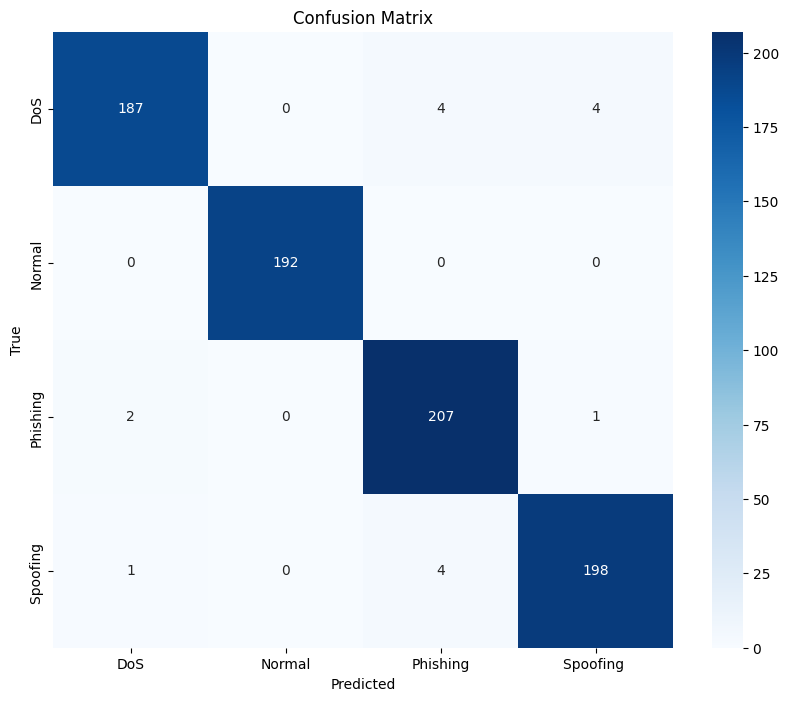

In [43]:
# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=attack_types, yticklabels=attack_types)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [44]:
# Load training history (optional)
history = np.load("cnn_training_history.npy", allow_pickle=True).item()

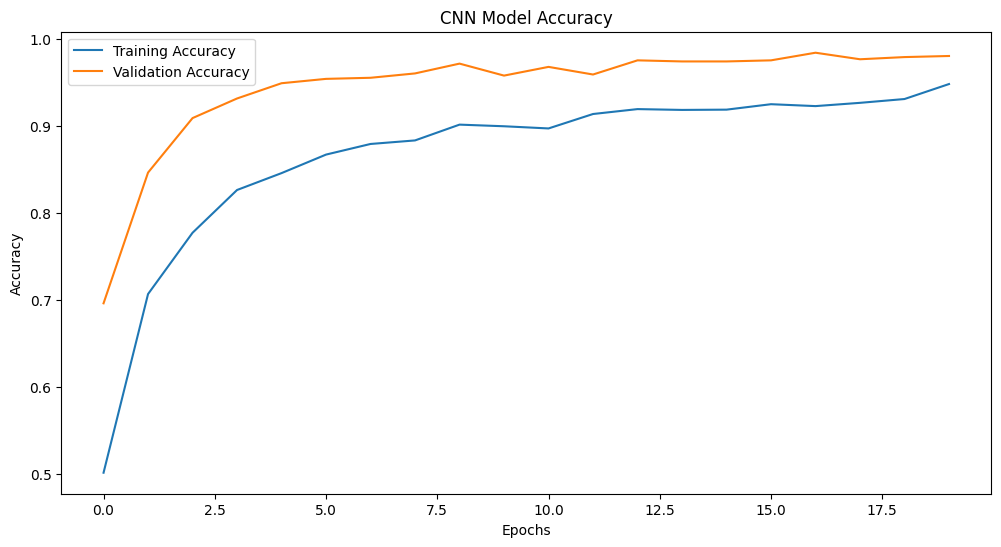

In [45]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

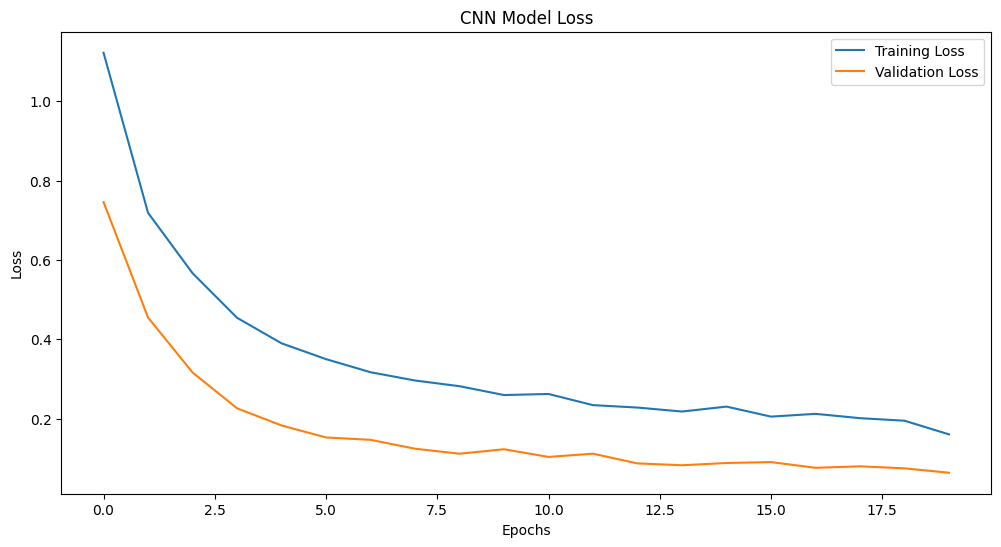

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
# Save metrics to a text file
with open("metrics.txt", "w") as f:
    f.write("Test Loss: {}\n".format(test_loss))
    f.write("Test Accuracy: {}\n".format(test_accuracy))
    f.write("Train Loss: {}\n".format(train_loss))
    f.write("Train Accuracy: {}\n".format(train_accuracy))
    f.write("\nClassification Report:\n")
    f.write(classification_rep)

print("Metrics saved to metrics.txt")

Metrics saved to metrics.txt
